In [1]:

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.feature_extraction import text

import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()

import pandas, numpy as np, textblob, string
from sklearn.utils import shuffle

import warnings

In [2]:

# load positive labels
pos = open('data/IRAhandle_tweets_1.csv').read()
npos = 0
poslabels, postexts = [], []
for i, line in enumerate(pos.split("\n")):
    content = line.split(',')
    if len(content) < 4:
    	continue;
    if content[4] != "English":
    	continue;
    poslabels.append(1)
    postexts.append(content[2])
    npos += 1

# load negative labels (random tweets)
neglabels, negtexts = [], []
neg = open('data/tweets-2016-10000-textonly.txt').read()
nneg = 0
for i, line in enumerate(neg.split("\n")):
    neglabels.append(0)
    negtexts.append(line)
    nneg += 1

print('Total number of datapoints: ', len(labels))
print('Positive labels: ', npos)
print('Negative labels: ', nneg)


NameError: name 'labels' is not defined

In [ ]:
def plot_common(texts, type):
    stop_words = text.ENGLISH_STOP_WORDS.union(["http", "https", "amp", "amb"])

    count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words = stop_words)
    count_vect.fit(texts)

    bag_of_words = count_vect.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
    words_freq = [w for w in words_freq if len(w[0]) > 2]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    freqs = words_freq[:20]

    words = [x[0] for x in freqs]
    y_pos = np.arange(len(freqs))
    counts = [x[1] for x in freqs]

    plt.bar(y_pos, counts, align='center', alpha=0.75)
    plt.xticks(y_pos, words, rotation='90')
    plt.ylabel('Count')
    plt.title('Most common words: ' + type + ' labels')

    plt.show()

In [ ]:
plot_common(postexts, "positive")

In [ ]:
plot_common(negtexts, "negative")

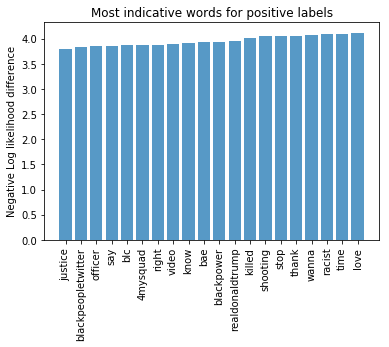

In [6]:
freqs = [('justice', 3.7973863620379005),
('blackpeopletwitter', 3.8301761848608917),
('officer', 3.8469833031772724),
('say', 3.8469833031772724),
('blc', 3.864077736536573),
('4mysquad', 3.881469479248442),
('right', 3.881469479248442),
('video', 3.8991690563478425),
('know', 3.917187561850521),
('bae', 3.9355367005187176),
('blackpower', 3.9355367005187176),
('realdonaldtrump', 3.9542288335308697),
('killed', 4.012497741654846),
('shooting', 4.053319736175101),
('stop', 4.053319736175101),
('thank', 4.053319736175101),
('wanna', 4.074373145372934),
('racist', 4.095879350593897),
('time', 4.095879350593897),
('love', 4.1178582573126725)]

words = [x[0] for x in freqs]
y_pos = np.arange(len(freqs))
counts = [x[1] for x in freqs]

plt.bar(y_pos, counts, align='center', alpha=0.75)
plt.xticks(y_pos, words, rotation='90')
plt.ylabel('Negative Log likelihood difference')
plt.title('Most indicative words for positive labels')

plt.show()